## Лабораторная работа №1 | Вариант 4

Выполнила: Стаценко Виктория  

### 1. Numpy

In [42]:
import numpy as np

1. Найти индексы не нулевых элементов массива [1,2,0,0,4,0]

In [43]:
arr = [1, 2, 0, 0, 4, 0]
indices = np.nonzero(arr)[0]
print(indices)

[0 1 4]


2. Создайте единичную матрицу размером 3х3

In [44]:
ident_matrix = np.eye(3)
print(ident_matrix)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


3. Создайте матрицу-шахматную доску 8х8 используя функцию `tile`

In [46]:
matrix2x2 = np.array([[0, 1],[1, 0]])
chessboard = np.tile(matrix2x2, (4, 4))
print(chessboard)

[[0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]]


4. Дан 1D массив, удалите все элементы которые входят в диапазон `[3, 8]` inplace

In [48]:
arr = [0, 4, 4, 2, 1, 4, 8, 7, 10, 15]
mask = (np.array(arr) < 3) | (np.array(arr) > 8)
arr = np.array(arr)[mask].tolist()
print(arr)

[0, 2, 1, 10, 15]


5. Создайте случайный вектор размером 10 элементов и замените максимальный элемент на 0

In [52]:
vec = np.random.rand(10)
print("Исходный вектор:", vec)

vec[np.argmax(vec)] = 0
print("После замены:", vec)

Исходный вектор: [0.78528697 0.35160026 0.42768097 0.29011495 0.24938043 0.45605269
 0.91486381 0.75450271 0.61390753 0.07175579]
После замены: [0.78528697 0.35160026 0.42768097 0.29011495 0.24938043 0.45605269
 0.         0.75450271 0.61390753 0.07175579]


6. Как распечатать все значения в массиве?

In [53]:
np.set_printoptions(threshold=np.inf)
arr = np.arange(100).reshape(10, 10)
print(arr)

[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]
 [50 51 52 53 54 55 56 57 58 59]
 [60 61 62 63 64 65 66 67 68 69]
 [70 71 72 73 74 75 76 77 78 79]
 [80 81 82 83 84 85 86 87 88 89]
 [90 91 92 93 94 95 96 97 98 99]]


7. Рассмотрим случайный вектор с формой 100х2, представляющей координаты, и найдем расстояния от точки к точке

In [54]:
points = np.random.rand(100, 2)
diff = points[:, np.newaxis, :] - points[np.newaxis, :, :]
dist_matrix = np.sqrt(np.sum(diff**2, axis=-1))
print("Первые 5 строк и столбцов матрицы расстояний:")
print(dist_matrix[:5, :5])
print(f"\nПолная форма матрицы: {dist_matrix.shape}")

Первые 5 строк и столбцов матрицы расстояний:
[[0.         0.40097014 0.59332781 0.57048955 0.32225866]
 [0.40097014 0.         0.86016843 0.61209902 0.55783105]
 [0.59332781 0.86016843 0.         0.42348241 0.30407366]
 [0.57048955 0.61209902 0.42348241 0.         0.30773779]
 [0.32225866 0.55783105 0.30407366 0.30773779 0.        ]]

Полная форма матрицы: (100, 100)


8. Как конвертировать массив float(32 bit) к массиву целых чисел (integer 32 bit) in place?

In [55]:
arr_float = np.array([1.1, 2.2, 3.3], dtype=np.float32)
print("До:", arr_float.dtype)
arr_float = arr_float.astype(np.int32, copy=False)
print("После:", arr_float.dtype)
print("Значения:", arr_float)

До: float32
После: int32
Значения: [1 2 3]


9. Как прочитать заданный файл?
```
1, 2, 3, 4, 5
6,  ,  , 7, 8
 ,  , 9,10,11
```

In [56]:
from io import StringIO

file_content = """1, 2, 3, 4, 5
6,  ,  , 7, 8
 ,  , 9,10,11"""

data = np.genfromtxt(StringIO(file_content), delimiter=',', dtype=float)
print(data)

[[ 1.  2.  3.  4.  5.]
 [ 6. nan nan  7.  8.]
 [nan nan  9. 10. 11.]]


10. Какой эквивалент enumerate для numpy массивов?

In [58]:
arr = np.array([[10, 20, 30],
                [40, 50, 60]])

for (i, j), value in np.ndenumerate(arr):
    print(f"arr[{i}, {j}] = {value}")

arr[0, 0] = 10
arr[0, 1] = 20
arr[0, 2] = 30
arr[1, 0] = 40
arr[1, 1] = 50
arr[1, 2] = 60


### 2. Pandas

Найдите ответы на вопросы или выполните действия с предложенным датасетом 

Файл: `russian-housing-market.csv`

```
price_doc - Цена продажи
id - Id транзакции
timestamp - Дата транзакции
full_sq - суммарная площадь в квадратных метрах, включая лоджию, валконы и отдельные нежилые помещения
life_sq - жилая площаль в квадратных метрах, исключая лоджии, балконы и прочие нежилые помещения
floor - для апартаментов, этаж помещения
max_floor - количество этажей в здании
material - материал стен
build_year - год постройки
num_room - количество жилых комнат
kitch_sq - площадь кухни
state - состояние апартаментов
product_type - покупка или инвестиция собственника-арендатора
sub_area - название района
```

In [3]:
import pandas as pd

In [78]:
df = pd.read_csv('russian-housing-market.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            30471 non-null  int64  
 1   timestamp     30471 non-null  object 
 2   full_sq       30471 non-null  int64  
 3   life_sq       24088 non-null  float64
 4   floor         30304 non-null  float64
 5   max_floor     20899 non-null  float64
 6   material      20899 non-null  float64
 7   build_year    16866 non-null  float64
 8   num_room      20899 non-null  float64
 9   kitch_sq      20899 non-null  float64
 10  state         16912 non-null  float64
 11  product_type  30471 non-null  object 
 12  sub_area      30471 non-null  object 
 13  price_doc     30471 non-null  int64  
dtypes: float64(8), int64(3), object(3)
memory usage: 3.3+ MB
None


1. Посчитайте количество записей в датасете с отсутствующей информацией о жилой площади жилого помещения

In [79]:
missing_life_sq_count = df['life_sq'].isnull().sum()
print(f"Количество записей с отсутствующей информацией о жилой площади: {missing_life_sq_count}")

Количество записей с отсутствующей информацией о жилой площади: 6383


2. Предложите способ заменить отсутствующие значения из пункта 1 и реализуйте его. Способ нужно аргументировать(сказать почему это достаточно хорошее приближение)

In [80]:
valid_ratio = df[df['life_sq'].notna() & df['full_sq'].notna()]
valid_ratio = valid_ratio[valid_ratio['life_sq'] <= valid_ratio['full_sq']]

print(f"Используем {len(valid_ratio)} корректных записей для расчета отношения")

typical_ratio = (valid_ratio['life_sq'] / valid_ratio['full_sq']).median()
print(f"Типичное отношение life_sq/full_sq: {typical_ratio:.3f}")
print(f"Это означает, что в среднем {typical_ratio*100:.1f}% площади - жилая")

mask = df['life_sq'].isna() & df['full_sq'].notna()
print(f"Найдено {mask.sum()} записей с пропусками life_sq, где известна full_sq")

df.loc[mask, 'life_sq'] = df.loc[mask, 'full_sq'] * typical_ratio
print(f"Заполнено {mask.sum()} значений по формуле: full_sq * {typical_ratio:.3f}")

remaining_nulls = df['life_sq'].isnull().sum()
print(f"Осталось пропусков после первого этапа: {remaining_nulls}")

if remaining_nulls > 0:
    median_life_sq = df['life_sq'].median()
    df['life_sq'] = df['life_sq'].fillna(median_life_sq)
    print(f"Заполнили оставшиеся {remaining_nulls} пропусков медианой: {median_life_sq}")

print(f"Пропуски в life_sq: {df['life_sq'].isnull().sum()}")
print(f"Медиана life_sq: {df['life_sq'].median():.1f}")
print(f"Среднее life_sq: {df['life_sq'].mean():.1f}")
print(f"Min life_sq: {df['life_sq'].min():.1f}")
print(f"Max life_sq: {df['life_sq'].max():.1f}")

# 1. Соотношение жилой/общей площади более стабильно, чем абсолютные значения
# 2. Автоматически учитывает размер квартиры
# 3. Получаем значения, пропорциональные общей площади

Используем 24051 корректных записей для расчета отношения
Типичное отношение life_sq/full_sq: 0.600
Это означает, что в среднем 60.0% площади - жилая
Найдено 6383 записей с пропусками life_sq, где известна full_sq
Заполнено 6383 значений по формуле: full_sq * 0.600
Осталось пропусков после первого этапа: 0
Пропуски в life_sq: 0
Медиана life_sq: 30.0
Среднее life_sq: 34.6
Min life_sq: 0.0
Max life_sq: 7478.0


3. Какие значения имеет 25, 50 и 75 перцентили полной площади помещения

In [82]:
percentiles = df['full_sq'].quantile([0.25, 0.5, 0.75])
print("Перцентили полной площади:")
print(f"25%: {percentiles[0.25]:.1f}")
print(f"50%: {percentiles[0.5]:.1f}") 
print(f"75%: {percentiles[0.75]:.1f}")

Перцентили полной площади:
25%: 38.0
50%: 49.0
75%: 63.0


4. Посчитайте среднюю стоимость продажи помещений с общей площадью от 50 до 70 квадратных метров

In [99]:
filtered_df = df[(df['full_sq'] >= 50) & (df['full_sq'] <= 70)]
average_price = filtered_df['price_doc'].mean()
print(f"Средняя стоимость продажи помещений с площадью от 50 до 70 м²: {average_price:,.0f}")

Средняя стоимость продажи помещений с площадью от 50 до 70 м²: 7,243,041


5. Какая максимальная этажность здания представлена в датасете

In [91]:
max_floor = df['max_floor'].max()
print(f"Максимальная этажность здания: {max_floor:.0f}")

Максимальная этажность здания: 117


6. Выявите район с самым дорогим жильем

In [85]:
avg_price_by_sub_area = df.groupby('sub_area')['price_doc'].mean().reset_index()
most_expensive_area = avg_price_by_sub_area.loc[avg_price_by_sub_area['price_doc'].idxmax(), 'sub_area']
print(f"Район с самым дорогим жильем: {most_expensive_area}")

Район с самым дорогим жильем: Hamovniki


7. Посчитайте среднюю стоимость за квадратный метр жилья в Митино(Mitino)

In [98]:
mitino_data = df[df['sub_area'] == 'Mitino']
mitino_data = mitino_data[mitino_data['full_sq'] > 0] 
mitino_data['price_per_sq'] = mitino_data['price_doc'] / mitino_data['full_sq']
avg_price_mitino = mitino_data['price_per_sq'].mean()
print(f"Средняя стоимость за кв.м в Митино: {avg_price_mitino:,.0f} руб.")

Средняя стоимость за кв.м в Митино: 171,841 руб.


8. Посчитайте среднюю площадь комнаты в Бибирево

In [89]:
bibirevo_data = df[df['sub_area'] == 'Bibirevo']
bibirevo_data = bibirevo_data[(bibirevo_data['num_room'] > 0) & (bibirevo_data['full_sq'] > 0)]
bibirevo_data['room_area'] = bibirevo_data['life_sq'] / bibirevo_data['num_room']
avg_room_area_bibirevo = bibirevo_data['room_area'].mean()
print(f"Средняя площадь комнаты в Бибирево: {avg_room_area_bibirevo:.2f} м²")

Средняя площадь комнаты в Бибирево: 16.06 м²


9. Проанализируйте есть ли разница в цене между квартирами на 1 и 9 этажах

In [97]:
first_floor_df = df[df['floor'] == 1]
ninth_floor_df = df[df['floor'] == 9]

avg_price_first_floor = first_floor_df['price_doc'].mean()
avg_price_ninth_floor = ninth_floor_df['price_doc'].mean()

print(f"Средняя цена на 1 этаже: {avg_price_first_floor:,.0f}")
print(f"Средняя цена на 9 этаже: {avg_price_ninth_floor:,.0f}")

difference = abs(avg_price_first_floor - avg_price_ninth_floor)
print(f"Разница в цене: {difference:,.0f}")

if difference > 0:
    if avg_price_first_floor > avg_price_ninth_floor:
        print("Квартиры на 1 этаже дороже, чем на 9 этаже.")
    else:
        print("Квартиры на 9 этаже дороже, чем на 1 этаже.")
else:
    print("Цена на 1 и 9 этажах одинакова.")

Средняя цена на 1 этаже: 5,739,380
Средняя цена на 9 этаже: 6,937,583
Разница в цене: 1,198,203
Квартиры на 9 этаже дороже, чем на 1 этаже.


10. Найдите минимальную стоимость квартиры с жилой площадью не менее 60 квадратных метров, не менее чем 3мя комнатами и не ниже чем на 5 этаже

In [100]:
filtered_df = df[
    (df['life_sq'] >= 60) &
    (df['num_room'] >= 3) &
    (df['floor'] >= 5)
]

if len(filtered_df) > 0:
    min_price = filtered_df['price_doc'].min()
    print(f"Минимальная стоимость квартиры: {min_price:,.0f}")
else:
    print("Не найдено квартир, удовлетворяющих всем условиям.")

Минимальная стоимость квартиры: 1,000,000


### 3. Визуализация

Используя библиотеки matplotlib/sns/plotly/pandas и набор данных представленный ранее визуализируйте

1. Как менялась средняя цена квартиры в Нагатинском Затоне(Nagatinski Zaton) с течением времени

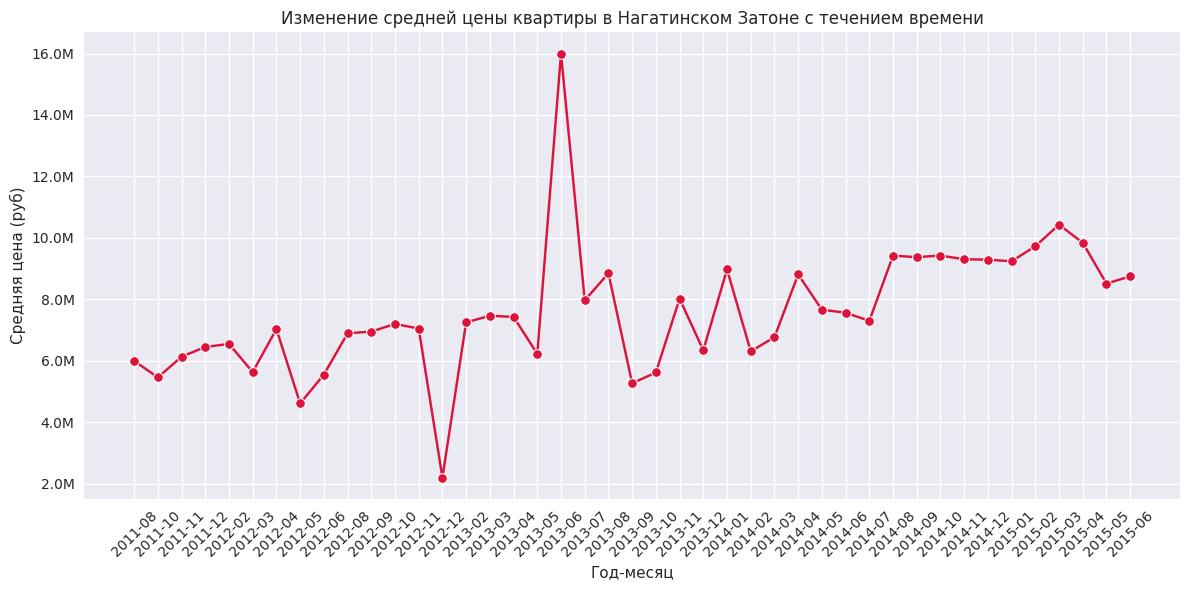

Найдено записей: 327
Количество месяцев: 43


In [134]:
import matplotlib.pyplot as plt
import seaborn as sns

nagatinski_zaton_df = df[df['sub_area'] == 'Nagatinskij Zaton'].copy() 

nagatinski_zaton_df['year_month'] = nagatinski_zaton_df['timestamp'].dt.to_period('M').astype(str)
avg_price_by_month = nagatinski_zaton_df.groupby('year_month')['price_doc'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_price_by_month, x='year_month', y='price_doc', marker='o', color="crimson")
plt.title('Изменение средней цены квартиры в Нагатинском Затоне с течением времени')
plt.xlabel('Год-месяц')
plt.ylabel('Средняя цена (руб)')
plt.xticks(rotation=45)

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1000000:.1f}M'))

plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Найдено записей: {len(nagatinski_zaton_df)}")
print(f"Количество месяцев: {len(avg_price_by_month)}")

2. Постройте гистограмму распределения цен на квартиры с общей площадью более 50 кв.метров

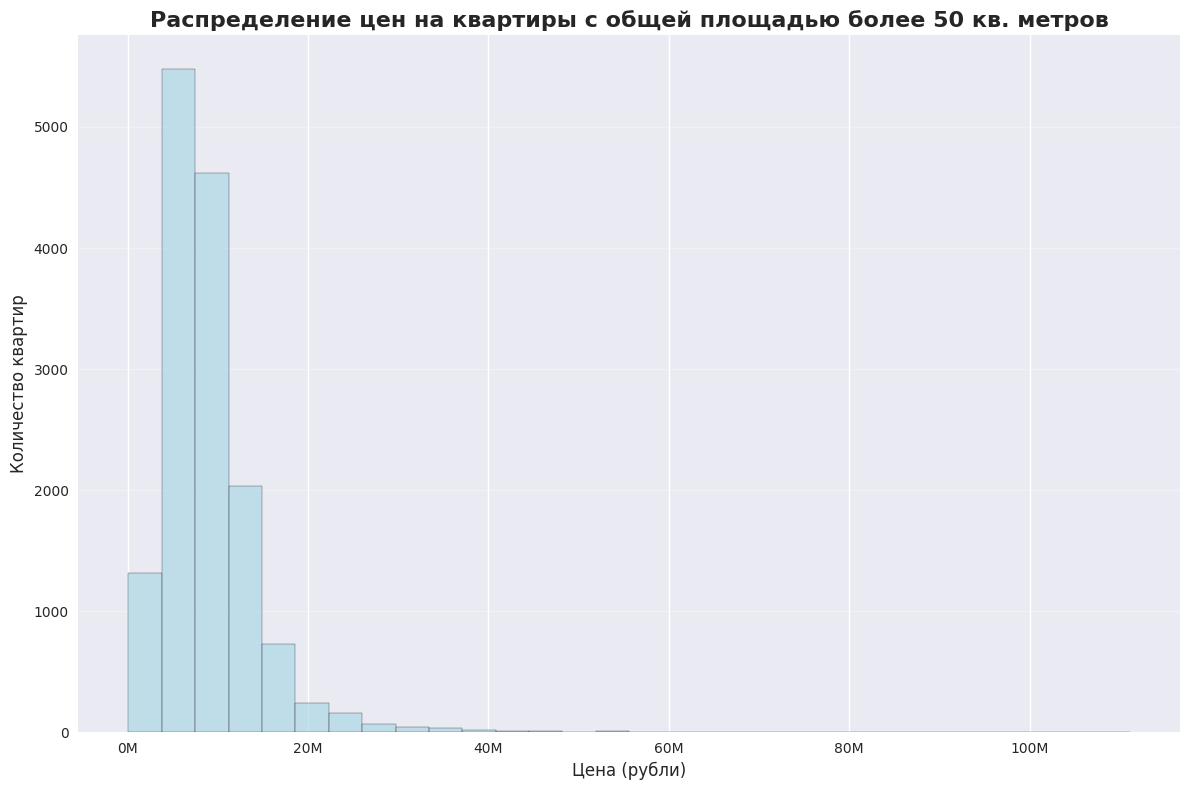

Всего квартир с площадью > 50 кв.м: 14840
Средняя цена: 9,025,361 руб.
Медианная цена: 7,900,000 руб.
Минимальная цена: 100,000 руб.
Максимальная цена: 111,111,112 руб.


In [118]:
filtered_df = df[df['full_sq'] > 50]

plt.style.use('seaborn-v0_8')
plt.figure(figsize=(12, 8))

plt.hist(filtered_df['price_doc'], bins=30, color='lightblue', edgecolor='black', alpha=0.7)

plt.title('Распределение цен на квартиры с общей площадью более 50 кв. метров', fontsize=16, fontweight='bold')
plt.xlabel('Цена (рубли)', fontsize=12)
plt.ylabel('Количество квартир', fontsize=12)
plt.grid(axis='y', alpha=0.3)

plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1000000:.0f}M'))

plt.tight_layout()
plt.show()

print(f"Всего квартир с площадью > 50 кв.м: {len(filtered_df)}")
print(f"Средняя цена: {filtered_df['price_doc'].mean():,.0f} руб.")
print(f"Медианная цена: {filtered_df['price_doc'].median():,.0f} руб.")
print(f"Минимальная цена: {filtered_df['price_doc'].min():,.0f} руб.")
print(f"Максимальная цена: {filtered_df['price_doc'].max():,.0f} руб.")

3. Визуализируйте количество проданных квартир в разных районах

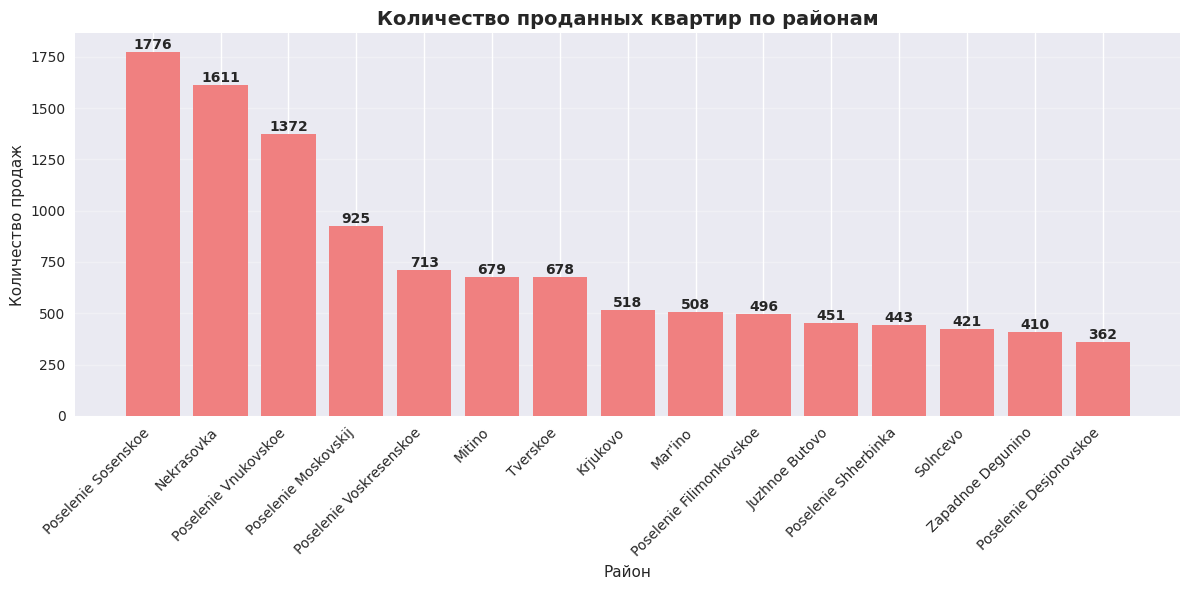

Самый популярный район: Poselenie Sosenskoe (1776 продаж)


In [120]:
district_counts = df['sub_area'].value_counts().head(15)

plt.figure(figsize=(12, 6))
bars = plt.bar(district_counts.index, district_counts.values, color='lightcoral')
plt.title('Количество проданных квартир по районам', fontsize=14, fontweight='bold')
plt.xlabel('Район')
plt.ylabel('Количество продаж')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{height}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"Самый популярный район: {district_counts.index[0]} ({district_counts.iloc[0]} продаж)")

4. Постройте box plot отображающий распределение полных площадей квартир в Басманном районе

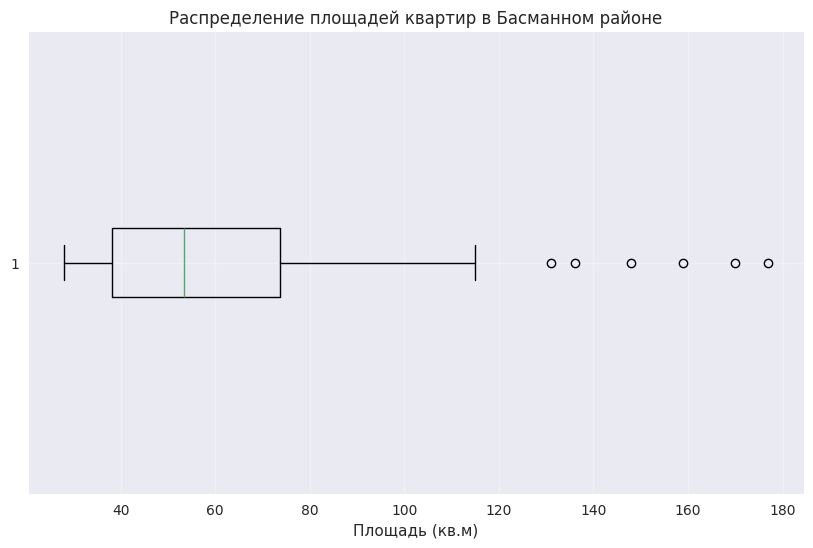

Количество квартир: 98
Мин. площадь: 28.0 кв.м
Макс. площадь: 177.0 кв.м
Средняя площадь: 61.2 кв.м
Медианная площадь: 53.5 кв.м


In [121]:
basmannoe = df[df['sub_area'] == 'Basmannoe']

plt.figure(figsize=(10, 6))
plt.boxplot(basmannoe['full_sq'].dropna(), vert=False)
plt.title('Распределение площадей квартир в Басманном районе')
plt.xlabel('Площадь (кв.м)')
plt.grid(True, alpha=0.3)
plt.show()

areas = basmannoe['full_sq'].dropna()
print(f"Количество квартир: {len(areas)}")
print(f"Мин. площадь: {areas.min():.1f} кв.м")
print(f"Макс. площадь: {areas.max():.1f} кв.м") 
print(f"Средняя площадь: {areas.mean():.1f} кв.м")
print(f"Медианная площадь: {areas.median():.1f} кв.м")

5. Визуализируйте зависимость средней стоимости квартир в зависимости от этажа

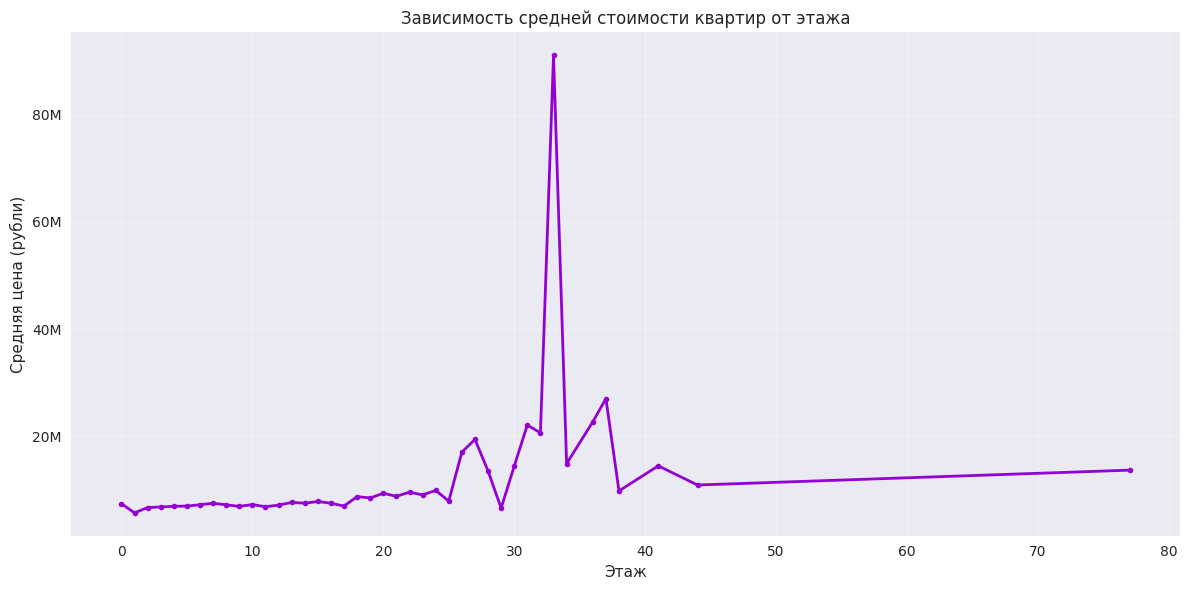

Анализировано квартир: 30304
Диапазон этажей: от 0 до 77

Самые дорогие этажи:
Этаж 33: 91,066,096 руб.
Этаж 37: 27,024,602 руб.
Этаж 36: 22,710,400 руб.


In [138]:
floor_data = df[['floor', 'price_doc']].dropna()

floor_prices = floor_data.groupby('floor')['price_doc'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(floor_prices['floor'], floor_prices['price_doc'], marker='o', linewidth=2, markersize=4, color="darkviolet")
plt.title('Зависимость средней стоимости квартир от этажа')
plt.xlabel('Этаж')
plt.ylabel('Средняя цена (рубли)')
plt.grid(True, alpha=0.3)

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1000000:.0f}M'))

plt.tight_layout()
plt.show()

print(f"Анализировано квартир: {len(floor_data)}")
print(f"Диапазон этажей: от {floor_prices['floor'].min():.0f} до {floor_prices['floor'].max():.0f}")
print(f"\nСамые дорогие этажи:")
top_floors = floor_prices.nlargest(3, 'price_doc')
for _, row in top_floors.iterrows():
    print(f"Этаж {row['floor']:.0f}: {row['price_doc']:,.0f} руб.")

6. Покажите как меняется средняя площадь квартир в зависимости от района

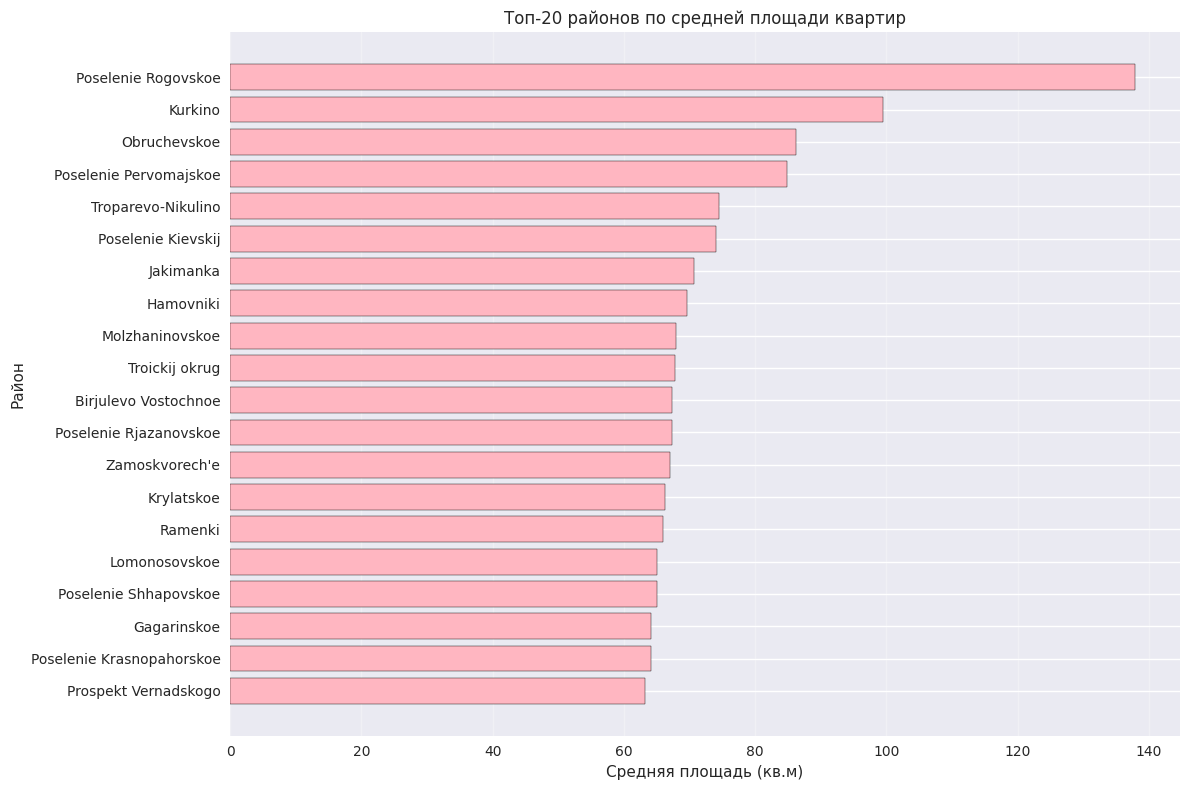

Топ-5 районов по средней площади:
1. Poselenie Rogovskoe: 137.8 кв.м
2. Kurkino: 99.5 кв.м
3. Obruchevskoe: 86.2 кв.м
4. Poselenie Pervomajskoe: 84.8 кв.м
5. Troparevo-Nikulino: 74.5 кв.м

Всего районов: 146
Общая средняя площадь: 54.2 кв.м


In [127]:
area_stats = df.groupby('sub_area')['full_sq'].mean().sort_values(ascending=False)

top_20 = area_stats.head(20)

plt.figure(figsize=(12, 8))
plt.barh(top_20.index, top_20.values, color='lightpink', edgecolor='black')
plt.title('Топ-20 районов по средней площади квартир')
plt.xlabel('Средняя площадь (кв.м)')
plt.ylabel('Район')
plt.grid(axis='x', alpha=0.3)
plt.gca().invert_yaxis()  

plt.tight_layout()
plt.show()

print("Топ-5 районов по средней площади:")
for i, (district, area) in enumerate(top_20.head().items(), 1):
    print(f"{i}. {district}: {area:.1f} кв.м")

print(f"\nВсего районов: {len(area_stats)}")
print(f"Общая средняя площадь: {df['full_sq'].mean():.1f} кв.м")

7. Постройте график изменения медианной цены на квартиру менее 50 кв. метров за период с 2011 до 2014 года*

\* Задание на доп. балл

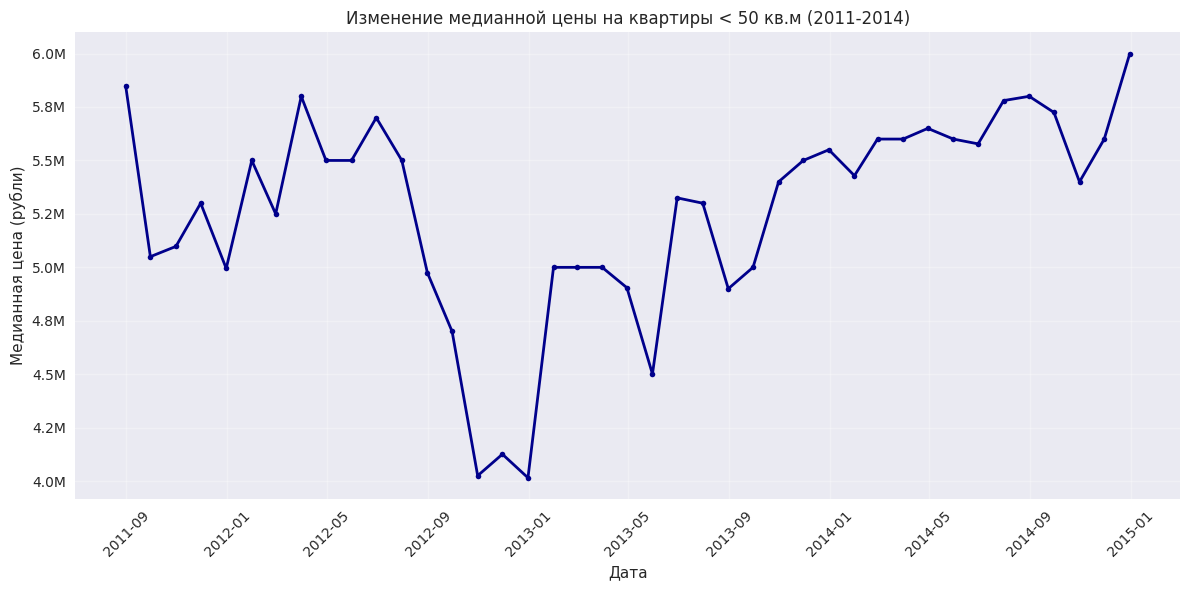

Проанализировано квартир < 50 кв.м: 13892
Период: 20.08.2011 - 31.12.2014
Начальная цена: 5,850,000 руб.
Конечная цена: 6,000,000 руб.


In [131]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
filtered_df = df[(df['full_sq'] < 50) & 
                (df['timestamp'].dt.year >= 2011) & 
                (df['timestamp'].dt.year <= 2014)]

monthly_prices = filtered_df.groupby(pd.Grouper(key='timestamp', freq='ME'))['price_doc'].median()

plt.figure(figsize=(12, 6))
plt.plot(monthly_prices.index, monthly_prices.values, marker='o', linewidth=2, markersize=4, color="darkblue")
plt.title('Изменение медианной цены на квартиры < 50 кв.м (2011-2014)')
plt.xlabel('Дата')
plt.ylabel('Медианная цена (рубли)')
plt.grid(True, alpha=0.3)

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1000000:.1f}M'))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print(f"Проанализировано квартир < 50 кв.м: {len(filtered_df)}")
print(f"Период: {filtered_df['timestamp'].min().strftime('%d.%m.%Y')} - {filtered_df['timestamp'].max().strftime('%d.%m.%Y')}")
print(f"Начальная цена: {monthly_prices.iloc[0]:,.0f} руб.")
print(f"Конечная цена: {monthly_prices.iloc[-1]:,.0f} руб.")